In [ ]:
import matplotlib.pyplot as plt
import lifa.fames.process_mixing_ratio as em
#from lifa.fames.reports import plot_signals
from importlib import reload

import glob
import numpy as np

### Lista de arquivos

In [249]:
# Gera lista de arquivos a serem processados. Arquivos precisam estar ordenados
files = sorted(glob.glob(r'.\sample_data\20241204_CEPEMA_FLARE_acima da chama_p=23\a???????.??????'))
files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20241204-Alex e Jairo\Meio chama p=23mm bom pra caralho\a???????.??????'))
files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20241204-Alex e Jairo\Topo chama p-23mm\a???????.??????'))
files = sorted(glob.glob(r'd:\FAMES\Medidas\Medidas CEPEMA\20241204-Alex e Jairo\Acima flare fast\a???????.??????'))
files = sorted(glob.glob(r'd:\FAMES\Medidas\CEPEMA-setembro2025-20250917T201022Z-1-001\CEPEMA-setembro2025\20250912 GRID\a???????.??????'))
files

['d:\\FAMES\\Medidas\\CEPEMA-setembro2025-20250917T201022Z-1-001\\CEPEMA-setembro2025\\20250912 GRID\\a2591218.354537',
 'd:\\FAMES\\Medidas\\CEPEMA-setembro2025-20250917T201022Z-1-001\\CEPEMA-setembro2025\\20250912 GRID\\a2591218.362648',
 'd:\\FAMES\\Medidas\\CEPEMA-setembro2025-20250917T201022Z-1-001\\CEPEMA-setembro2025\\20250912 GRID\\a2591218.370762',
 'd:\\FAMES\\Medidas\\CEPEMA-setembro2025-20250917T201022Z-1-001\\CEPEMA-setembro2025\\20250912 GRID\\a2591218.374877',
 'd:\\FAMES\\Medidas\\CEPEMA-setembro2025-20250917T201022Z-1-001\\CEPEMA-setembro2025\\20250912 GRID\\a2591218.382991',
 'd:\\FAMES\\Medidas\\CEPEMA-setembro2025-20250917T201022Z-1-001\\CEPEMA-setembro2025\\20250912 GRID\\a2591218.391107',
 'd:\\FAMES\\Medidas\\CEPEMA-setembro2025-20250917T201022Z-1-001\\CEPEMA-setembro2025\\20250912 GRID\\a2591218.395220',
 'd:\\FAMES\\Medidas\\CEPEMA-setembro2025-20250917T201022Z-1-001\\CEPEMA-setembro2025\\20250912 GRID\\a2591218.403335',
 'd:\\FAMES\\Medidas\\CEPEMA-setembro202

### Configuração de processamento

In [ ]:
# Configuração do processamento
config = {
    'zenith_angle': 12,
    'elevation': 0,
    'cross_talk_355_353': 160,
    'ch4_cal': 4000,
    'co2_cal': 26000,
    'ce_cal': 0.25,
    'fluo_cal': 100,
    'z_ref_idx': 96,
    'z_flare_idx': 106,
    'dead_time': 1/240,
    'background_min_idx': 4000, #index min para regiao de background ~12000
    'background_max_idx' : 4900, #index max para regiao considerada background ~15000
    'z_min_flare': 300,
    'z_max_flare': 500,
    'flare_roi': 10,
    'flare_pos': 400,
    'n2_raman': {'channel':'00353.o_an', 'bin_shift':0, 'lambda': 323},
    'rayleigh': {'channel':'00355.o_an', 'bin_shift':0, 'lambda': 355},
    'co2_raman': {'channel':'00371.o_ph', 'bin_shift':3, 'lambda': 371},
    'ch4_raman_s': {'channel':'00395.s_ph', 'bin_shift':3, 'lambda': 395},
    'ch4_raman_p': {'channel':'00395.p_ph', 'bin_shift':3, 'lambda': 395},
    'fluorescence': {'channel':'00460.o_an', 'bin_shift':1, 'lambda': 460},
    'n2_raman_b': {'channel':'00530.o_an', 'bin_shift':0, 'lambda': 530},
    'rayleigh_b': {'channel':'00532.o_an', 'bin_shift':0, 'lambda': 532},
}

### Processamento

In [252]:
# Junta arquivos em grupos e processa. Saida é um Dataframe pandas
step = 1    # Passo para grupos de média
size = 2   # Numero de arquivos sequencias para media
reload(em)
output = em.emissions_group(files, config=config, step=step, size=size)
output

ValueError: Background subraction index 12000 larger than signal length 5000.

### Apresentação

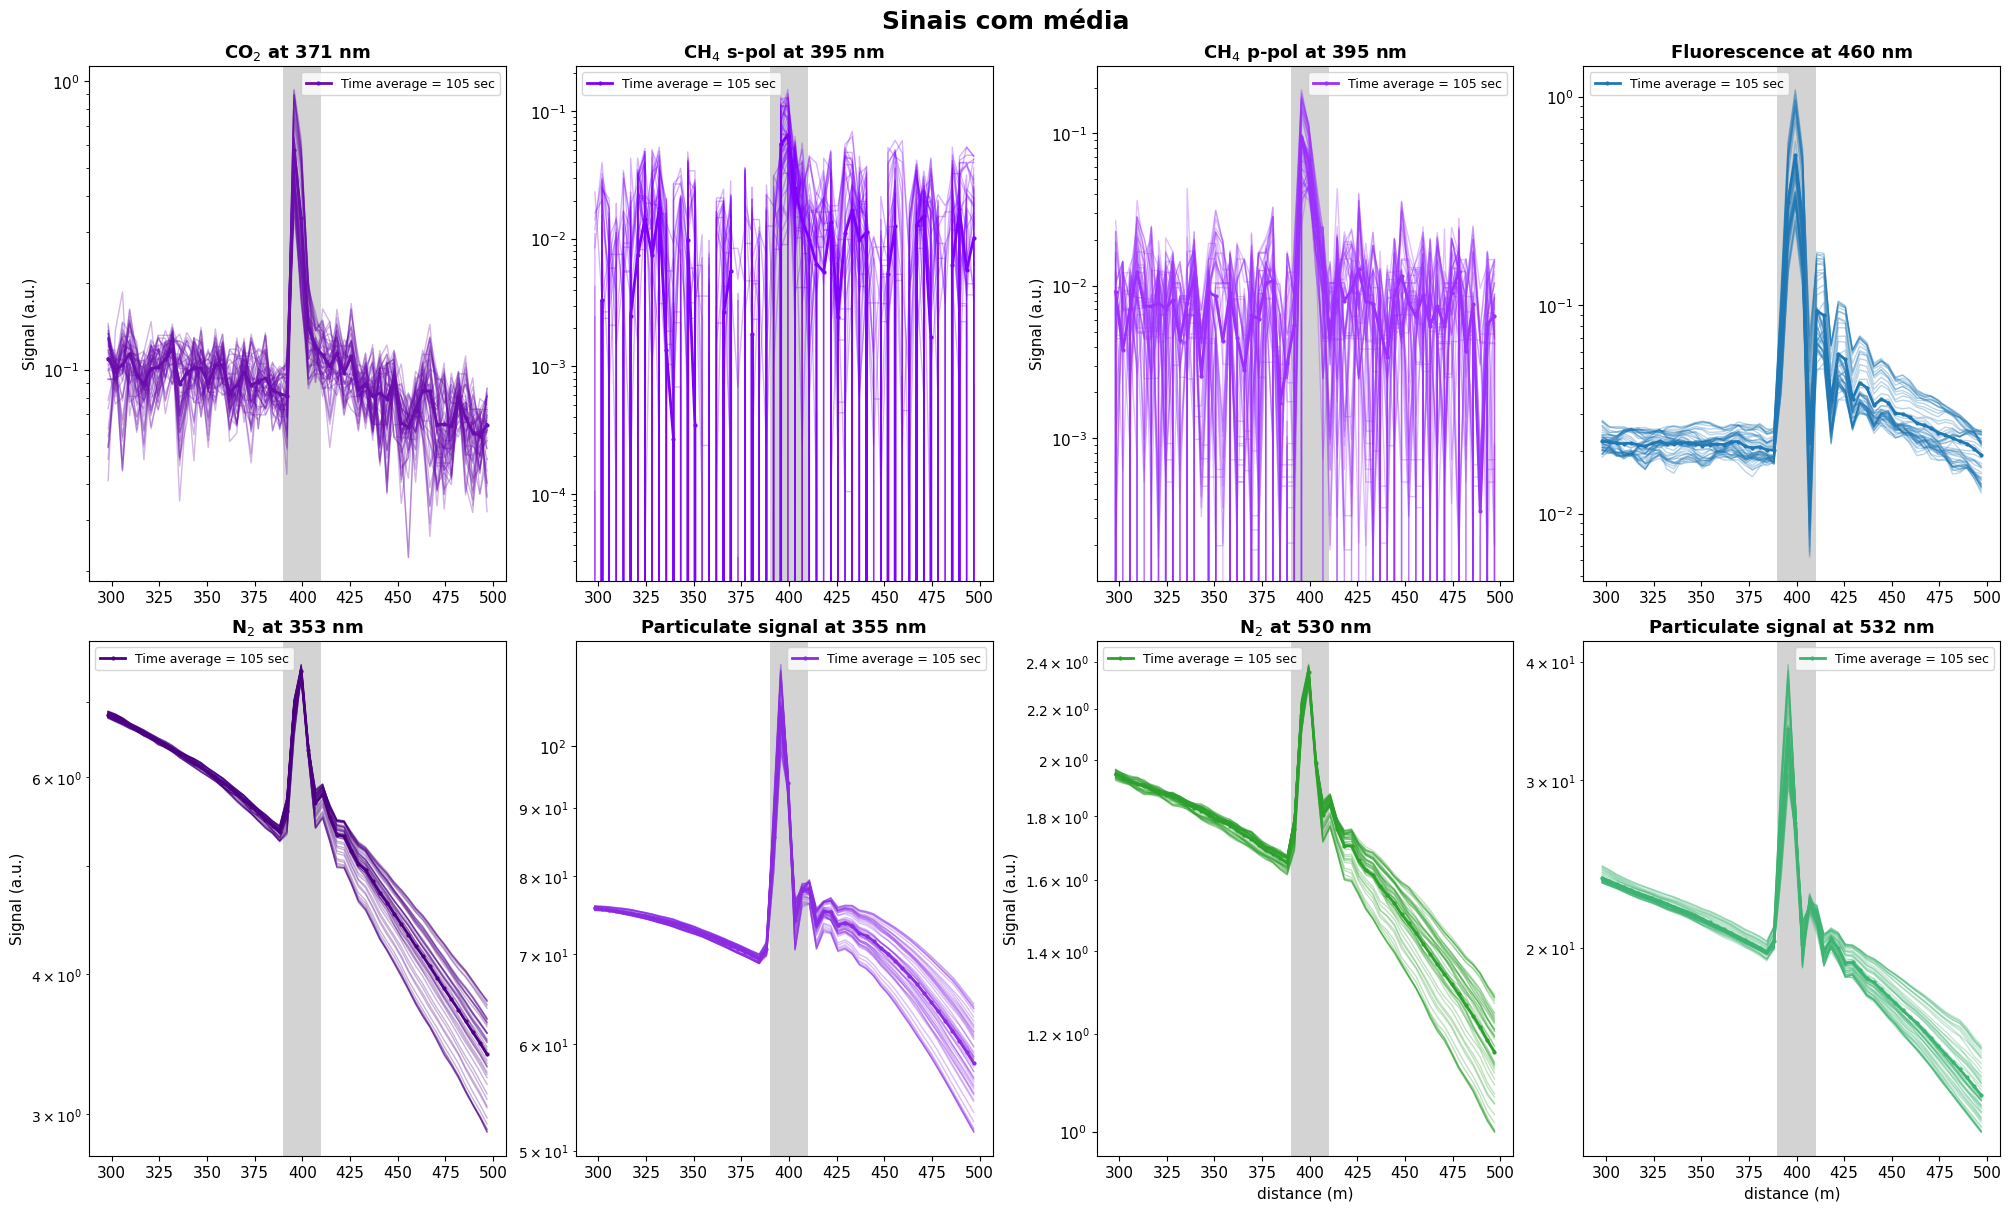

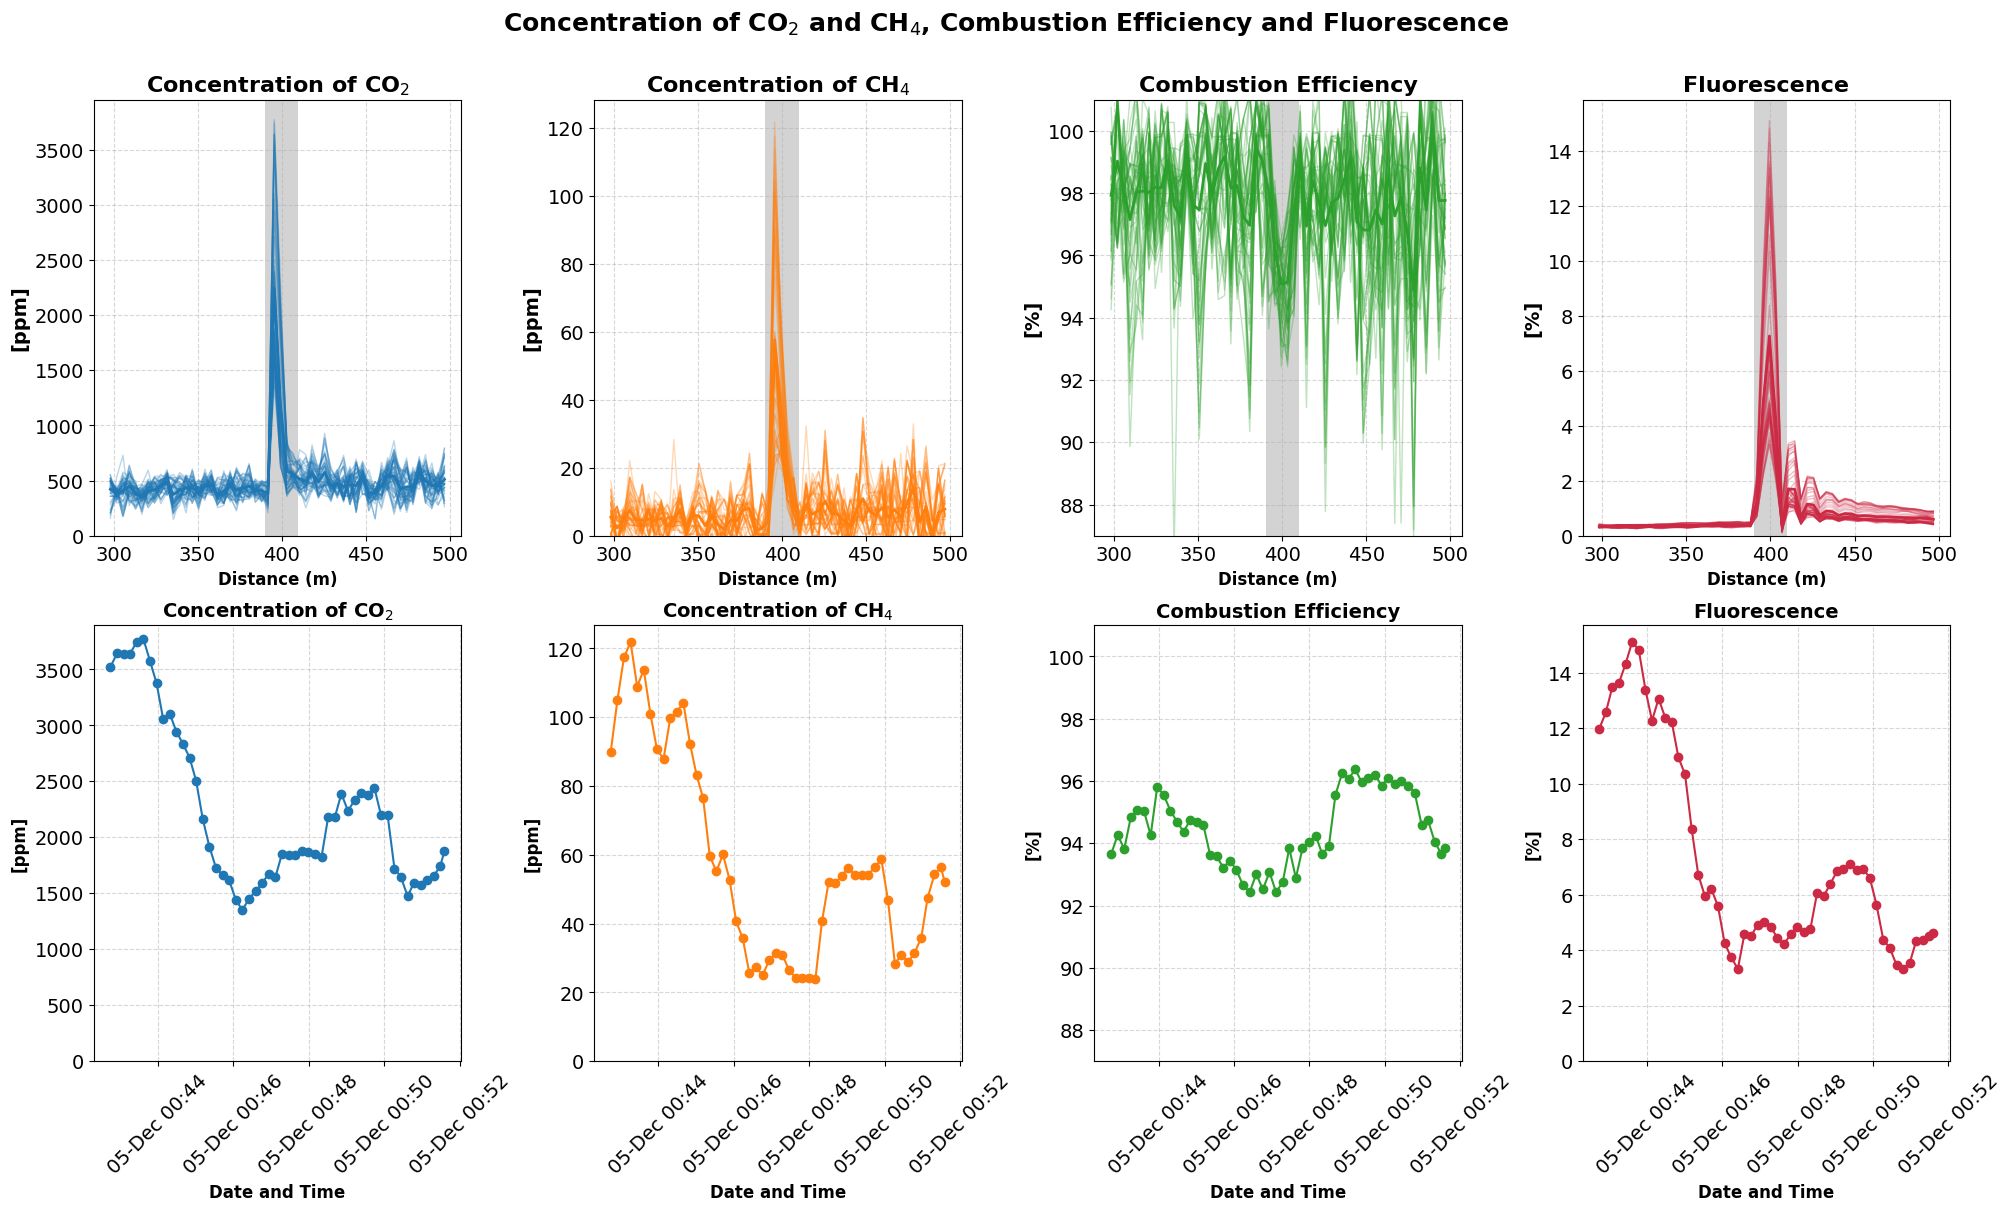

In [247]:
import fames_reports as fames
reload(fames)

fig = fames.plot_signals(output)
plt.show()
fig_mix = fames.plot_emissions(output)
plt.show()
